## Food Safety San Francisco Project

Data was obtained July 20, 2020

##### Load Packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

#import bz2 # Used to read compressed data
#import os # Used to interact with the file system

##### Load Restaurant Score Dataset

In [2]:
sf_rest_scores = pd.read_csv("Restaurant_Scores_-_LIVES_Standard.csv")
sf_rest_scores.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,...,New Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
zip_counts = sf_rest_scores.business_postal_code.value_counts()
print(zip_counts.to_string())

94110         5921
94103         4868
94102         3789
94109         3692
94133         3325
94107         2718
94118         2633
94112         2333
94122         2158
94105         2104
94115         2039
94108         2009
94121         1917
94111         1773
94114         1673
94124         1499
94117         1327
94123         1257
94104         1138
94132         1068
94134         1004
94116          810
94127          596
94131          549
94158          306
94130           43
94101           30
94143           20
CA              13
94301           11
Ca              11
94120           11
94901           10
92672            9
94080            9
95122            8
94013            8
941              7
941102019        7
64110            6
00000            6
94188            6
941033148        5
94544            5
95117            5
95132            5
94123-3106       5
95133            4
95112            4
94117-3504       4
94124-1917       4
94602            3
94518       

##### Valid Zipcodes in SF

In [4]:
valid_zips = pd.read_json('sf_zipcodes.json', dtype=str).zip_codes
valid_zips.head()

0    94102
1    94103
2    94104
3    94105
4    94107
Name: zip_codes, dtype: object

##### Invalid Zipcodes 

In [5]:
invalid_zip_bus = sf_rest_scores[~sf_rest_scores["business_postal_code"].isin(valid_zips)]
invalid_zip_bus.head(20)

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,70708,El Calamar,Off The Grid,San Francisco,CA,NaN,NaN,NaN,NaN,1.415571e+10,...,Routine - Unscheduled,70708_20181218_103112,No hot water or running water,High Risk,NaN,NaN,NaN,NaN,NaN,NaN
17,84740,Judie's Tacos Locos,Off The Grid,San Francisco,CA,NaN,NaN,NaN,NaN,1.415942e+10,...,Structural Inspection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,84740,Judie's Tacos Locos,Off The Grid,San Francisco,CA,NaN,NaN,NaN,NaN,1.415942e+10,...,Reinspection/Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,87337,Whisk On Wheels,Off the Grid,San Francisco,CA,NaN,NaN,NaN,NaN,NaN,...,Structural Inspection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,85320,Curry Up Now #4,Approved Locations,San Francisco,CA,NaN,NaN,NaN,NaN,NaN,...,Structural Inspection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,102245,Vessell CA Operations (#4),2351 Mission St,San Francisco,CA,NaN,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,71753,Sunrise Deli,Off The Grid,San Francisco,CA,NaN,NaN,NaN,NaN,1.415033e+10,...,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,84740,Judie's Tacos Locos,Off The Grid,San Francisco,CA,NaN,NaN,NaN,NaN,1.415942e+10,...,Structural Inspection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,82690,Hula Truck,Off The Grid,San Francisco,CA,NaN,NaN,NaN,NaN,1.415847e+10,...,Routine - Unscheduled,82690_20171020_103105,Improper cooling methods,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


##### Which addresses are generally missing zipcodes? 

In [6]:
missing_zip_address_count = sf_rest_scores[sf_rest_scores.business_postal_code.isnull()].business_address.value_counts()
missing_zip_address_count.head(10)

Off The Grid                  199
Off the Grid                   55
1717 Harrison St               27
842 Geary St                   25
625 Clement St                 25
1051 Market St                 24
Approved Locations             23
3200 24th St                   19
Approved Private Locations     18
370 Golden Gate Ave            17
Name: business_address, dtype: int64

In [7]:
sf_rest_scores['postal5'] = None
sf_rest_scores.loc[sf_rest_scores.business_postal_code != '-9999', 'postal5'] = sf_rest_scores.business_postal_code.str[:5]
sf_rest_scores.postal5[~sf_rest_scores["postal5"].isin(valid_zips)] = None

sf_rest_scores.head()

C:\Users\Daoanh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods,postal5
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN,94118
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94110
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94111
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN,94109


##### Are business ID's unique?

In [8]:
sf_rest_scores.business_id.is_unique

False

In [9]:
list(sf_rest_scores.columns.values)

['business_id',
 'business_name',
 'business_address',
 'business_city',
 'business_state',
 'business_postal_code',
 'business_latitude',
 'business_longitude',
 'business_location',
 'business_phone_number',
 'inspection_id',
 'inspection_date',
 'inspection_score',
 'inspection_type',
 'violation_id',
 'violation_description',
 'risk_category',
 'Neighborhoods (old)',
 'Police Districts',
 'Supervisor Districts',
 'Fire Prevention Districts',
 'Zip Codes',
 'Analysis Neighborhoods',
 'postal5']

In [10]:
sf_rest_scores["inspection_date"]

0        06/06/2019 12:00:00 AM
1        07/25/2019 12:00:00 AM
2        09/12/2017 12:00:00 AM
3        06/25/2019 12:00:00 AM
4        10/11/2016 12:00:00 AM
5        03/21/2019 12:00:00 AM
6        02/22/2019 12:00:00 AM
7        03/27/2019 12:00:00 AM
8        04/29/2017 12:00:00 AM
9        03/25/2019 12:00:00 AM
10       07/05/2019 12:00:00 AM
11       10/30/2018 12:00:00 AM
12       04/01/2019 12:00:00 AM
13       12/18/2018 12:00:00 AM
14       03/25/2019 12:00:00 AM
15       07/11/2019 12:00:00 AM
16       05/24/2019 12:00:00 AM
17       03/26/2019 12:00:00 AM
18       03/27/2019 12:00:00 AM
19       09/19/2017 12:00:00 AM
20       06/13/2019 12:00:00 AM
21       01/17/2019 12:00:00 AM
22       03/25/2019 12:00:00 AM
23       03/21/2019 12:00:00 AM
24       10/10/2018 12:00:00 AM
25       06/06/2019 12:00:00 AM
26       03/26/2019 12:00:00 AM
27       08/08/2018 12:00:00 AM
28       07/03/2018 12:00:00 AM
29       09/19/2019 12:00:00 AM
                  ...          
53943   

In [11]:
sf_rest_scores["timestamp"] = pd.to_datetime(sf_rest_scores["inspection_date"])
sf_rest_scores["timestamp"]

0       2019-06-06
1       2019-07-25
2       2017-09-12
3       2019-06-25
4       2016-10-11
5       2019-03-21
6       2019-02-22
7       2019-03-27
8       2017-04-29
9       2019-03-25
10      2019-07-05
11      2018-10-30
12      2019-04-01
13      2018-12-18
14      2019-03-25
15      2019-07-11
16      2019-05-24
17      2019-03-26
18      2019-03-27
19      2017-09-19
20      2019-06-13
21      2019-01-17
22      2019-03-25
23      2019-03-21
24      2018-10-10
25      2019-06-06
26      2019-03-26
27      2018-08-08
28      2018-07-03
29      2019-09-19
           ...    
53943   2019-04-25
53944   2019-04-15
53945   2018-05-18
53946   2019-03-21
53947   2019-04-26
53948   2019-04-16
53949   2019-05-10
53950   2019-04-29
53951   2019-04-18
53952   2019-04-26
53953   2019-04-23
53954   2019-04-18
53955   2019-05-09
53956   2019-04-19
53957   2019-05-01
53958   2019-03-11
53959   2019-04-25
53960   2019-04-18
53961   2019-05-03
53962   2019-04-16
53963   2019-04-12
53964   2019

In [12]:
sf_rest_scores['year'] = None
sf_rest_scores['year'] = sf_rest_scores['timestamp'].dt.year

Text(0, 0.5, 'Frequency')

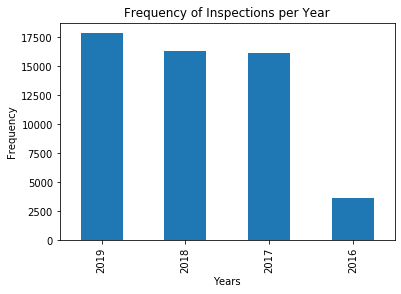

In [13]:
sf_rest_scores['year'].value_counts().plot('bar')
plt.title('Frequency of Inspections per Year')
plt.xlabel('Years')
plt.ylabel('Frequency')

In [14]:
low_score_violations = sf_rest_scores[sf_rest_scores.inspection_score < 65]
low_score_violations = low_score_violations.violation_description.value_counts()

low_score_violations.head(20)

Unclean or unsanitary food contact surfaces                                  43
High risk food holding temperature                                           42
Unclean or degraded floors walls or ceilings                                 40
Unapproved or unmaintained equipment or utensils                             39
High risk vermin infestation                                                 37
Foods not protected from contamination                                       37
Inadequate and inaccessible handwashing facilities                           35
Inadequate food safety knowledge or lack of certified food safety manager    35
Improper thawing methods                                                     30
Unclean hands or improper use of gloves                                      27
Improper cooling methods                                                     25
Unclean nonfood contact surfaces                                             21
Inadequately cleaned or sanitized food c

Ideas:
Cross check of frequency of inspection with lower/higher score trend 

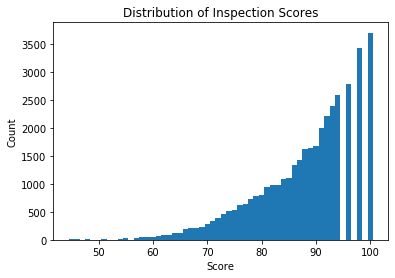

In [19]:
sf_rest_scores = sf_rest_scores[sf_rest_scores.inspection_score > 0]
plt.figure(figsize=(6,4))
plt.xlabel("Score")
plt.ylabel("Count")
plt.title("Distribution of Inspection Scores")
plt.bar(np.unique(sf_rest_scores.inspection_score)[::-1], height = sf_rest_scores["inspection_score"].value_counts(), width = 1);
